In [3]:
import pandas as pd
from pathlib import Path
import pyreadstat
import json

pd.set_option('display.max_columns', None)

DATA_PATH = Path('data')
DATA_PATH.mkdir(exist_ok=True)
YEAR_RANGE = range(2009, 2023)

MATRIMONIO_FILES = [DATA_PATH / f'{year}_Matrimonios.sav' for year in YEAR_RANGE]
DIVORCIO_FILES = [DATA_PATH / f'{year}_Divorcios.sav' for year in YEAR_RANGE]



In [ ]:


COLUMN_MAPPING_PATH = DATA_PATH / 'matrimonio_column_map.json'

if not COLUMN_MAPPING_PATH.is_file():
    column_data = {}

    for file in MATRIMONIO_FILES:
        _, metadata = pyreadstat.read_sav(file, metadataonly=True)
        column_data[file.name] = [c.lower().strip() for c in metadata.column_names]

    with open(COLUMN_MAPPING_PATH, mode='w', encoding='utf8') as file:
        json.dump(column_data, file, indent=4)

with open(COLUMN_MAPPING_PATH, mode='r', encoding='utf8') as file:
    column_map = json.load(file)

unique_columns = sorted(set().union(*column_map.values()))

comparison_df = pd.DataFrame({
    file: [col in cols_in_this_file for col in unique_columns]
    for file, cols_in_this_file  in column_map.items()
}, index=unique_columns)

comparison_df = comparison_df.T 
comparison_df


,areag,areagocu,añoocu,añoreg,ciuohom,ciuomuj,clauni,depocu,depreg,diaocu,edadhom,edadmuj,eschom,escmuj,gethom,getmuj,mesocu,mesreg,mupocu,mupreg,nachom,nacmuj,nunuho,nunumu,nuphon,nupmuj,ocuhom,ocumuj,puehom,puemuj
2009_Matrimonios.sav,True,False,True,True,False,False,True,True,True,False,True,True,False,False,True,True,True,True,True,True,True,True,False,False,True,True,True,True,False,False
2010_Matrimonios.sav,True,False,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,True,True,False,False
2011_Matrimonios.sav,True,False,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,True,True,False,False
2012_Matrimonios.sav,True,False,False,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,True,True,False,False
2013_Matrimonios.sav,False,True,False,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True,False,False,False,False,False,False,True,True
2014_Matrimonios.sav,False,True,False,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True,False,False,False,False,False,False,True,True
2015_Matrimonios.sav,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True,True,True,False,False,False,False,True,True
2016_Matrimonios.sav,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True,True,True,False,False,False,False,True,True
2017_Matrimonios.sav,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True,True,True,False,False,False,False,True,True
2018_Matrimonios.sav,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True,True,True,False,False,False,False,True,True


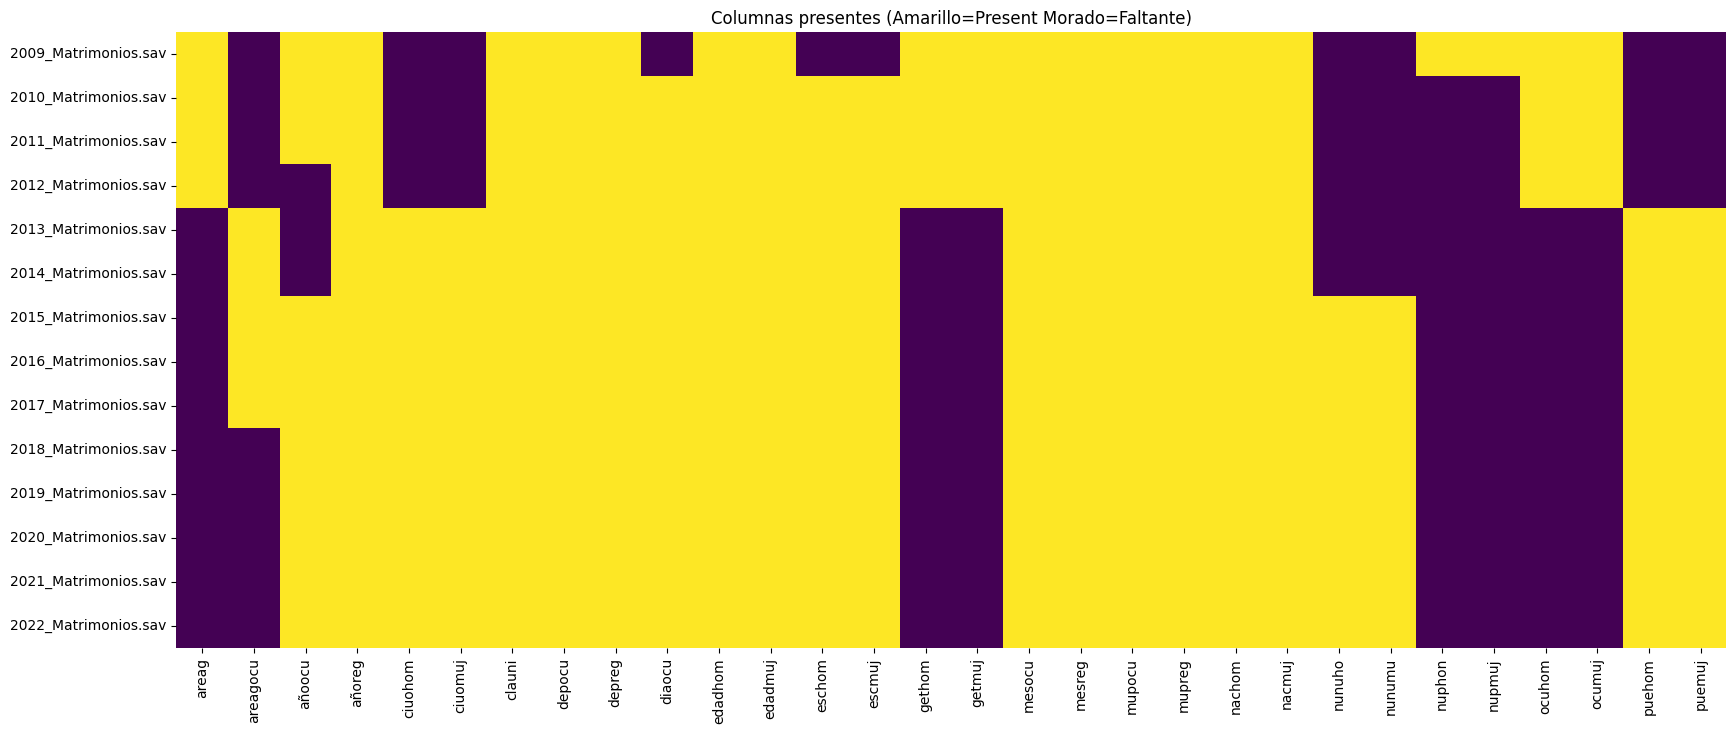

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
sns.heatmap(comparison_df, cbar=False, cmap='viridis')
plt.title('Columnas presentes (Amarillo=Present Morado=Faltante)')

plt.show()


In [78]:
NON_CATEGORICAL_COLUMNS = ['edadhom', 'edadmuj', 'añoocu', 'añoreg', 'diaocu']
MATRIMONIO_CATEGORICAL_COLUMNs__PATH = DATA_PATH / 'matrimonio_categorical_values.json'

if not MATRIMONIO_CATEGORICAL_COLUMNs__PATH.is_file():
    category_summary = {}

    for file in MATRIMONIO_FILES:
        _, metadata = pyreadstat.read_sav( file, metadataonly=True)
        cols_to_read = metadata.column_names
        cols_to_read = [c for c in cols_to_read if c.lower() not in NON_CATEGORICAL_COLUMNS]

        df, metadata = pyreadstat.read_sav(file, usecols=cols_to_read)

        df.columns = df.columns.str.lower()

        all_uniques = df.apply(lambda x: x.unique().tolist())

        category_summary[file.name] = {
            col.lower(): {
                'uniques': all_uniques[col.lower()],
                'labels': metadata.variable_value_labels.get(col, {})
            }
            for col in cols_to_read
        }
    
    with open(MATRIMONIO_CATEGORICAL_COLUMNs__PATH, mode='w', encoding='utf8') as file:
        json.dump(category_summary, file, indent=4, default=str)


In [ ]:
IMAGES_PATH = Path('img')
IMAGES_PATH.mkdir(exist_ok=True)

with open(MATRIMONIO_CATEGORICAL_COLUMNs__PATH, mode='r') as file:
    category_summary = json.load(file)

def visualize_category_inventory(col_name, summary):
    all_labels_set = set()
    for file_name, file_content in summary.items():
        if col_name in file_content:
            labels_dict = file_content[col_name].get('labels', {})
            all_labels_set.update(labels_dict.values())
            
    sorted_labels = sorted(list(all_labels_set))
    
    if not sorted_labels:
        print(f"No labels found for column: {col_name}")
        return

    presence_matrix = pd.DataFrame(index=sorted_labels)

    for file_name, file_content in summary.items():
        if col_name in file_content:
            current_labels = set(file_content[col_name].get('labels', {}).values())
            
            presence_matrix[file_name] = [label in current_labels for label in sorted_labels]
        else:
            presence_matrix[file_name] = False

    plt.figure(figsize=(12, len(sorted_labels) * 0.7 + 3))

    sns.heatmap(
        presence_matrix,
        cbar=False,
        linewidths=1,
        linecolor='white'
        )
    
    plt.title(f'Unique labels {col_name} (Negro=No existe)', fontsize=15, pad=20)
    plt.xlabel('Source file')
    plt.ylabel('Labels')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(IMAGES_PATH / f'{col_name}_unique_labels.png')

for col in unique_columns:
    visualize_category_inventory(col, category_summary)

In [1]:
COLUMN_TO_MERGE_MAPPING = {
    'areag': 'area_geografica',
    'areagocu': 'area_geografica',
    'gethom': 'pueblo_hombre',
    'puehom': 'pueblo_hombre',
    'getmuj': 'pueblo_mujer',
    'puemuj': 'pueblo_mujer',
    'nuphon': 'nupcialidad_hombre',
    'nunuho': 'nupcialidad_hombre',
    'nupmuj': 'nupcialidad_mujer',
    'nunumu': 'nupcialidad_mujer',
}

COLUMNS_NOT_INCLUDE_IN_FINAL_COMBINATION = [
    'ocuhom','ocumuj', 'ciuohom', 'ciuomuj', 'mupocu', 'mupreg', 'nachom', 'nacmuj', 'diaocu', 'clauni', 'añoocu', 'añoreg'
]

# Key = orginal, Value = harmonized
# Columns puehom, puemuj, gethom, getmuj
LABEL_HARMONIZATION_PUEBLO = {
    'Xinka': 'Xinca',
    'Xinca': 'Xinca',
    'Otro': 'Otro',
    'Ignorado': 'Ignorado',
    'Garífuna': 'Garifuna',
    'Ladino / Mestizo': 'Ladino_Mestizo',
    'Mestizo, Ladino': 'Ladino_Mestizo',
    'Mestizo / Ladino': 'Ladino_Mestizo',
    'Maya': 'Maya',
    'Indigena': 'Indigena',
    'No indigena': 'No indigena',
    'No Indigena': 'No indigena',
}

#Columns areag, areagocu
LABEL_HARMONIZATION_AREA_GEOGRAFICA = {
     'Urbano': 'Urbano',
     'Rural': 'Rural',
     'Ignorado': 'Ignorado',
}

#Columns eschom, escmuj
LABEL_HARMOZIATION_ESCOLARIDAD = {
    'Básico': 'Basico',
    'DIversificado': 'Diversificado',
    'Diversificado': 'Diversificado',
    'Ignorado': 'Ignorado',
    'Ninguna': 'Ninguno',
    'Ninguno': 'Ninguno',
    'Post Grado': 'Post grado',
    'Post grado': 'Post grado',
    'Postgrado': 'Post grado',
    'Primaria': 'Primaria',
    'Universitario': 'Universitario'
}

#Columns depreg, depocu
LABEL_HARMONIZATION_DEPARTAMENTO = {
    'Alta Verapaz': 'Alta Verapaz',
    'Baja Verapaz': 'Baja Verapaz',
    'Chimaltenango': 'Chimaltenango',
    'Chiquimula': 'Chiquimula',
    'El Progreso': 'El Progreso',
    'Escuintla': 'Escuintla',
    'Guatemala': 'Guatemala',
    'Huehuetenango': 'Huehuetenango',
    'Izabal': 'Izabal',
    'Jalapa': 'Jalapa',
    'Jutiapa': 'Jutiapa',
    'Peten': 'Peten',
    'Petén': 'Peten',
    'Quetzaltenango': 'Quetzaltenango',
    'Quiche': 'Quiche',
    'Quiché': 'Quiche',
    'Retalhuleu': 'Retalhuleu',
    'Sacatepequez': 'Sacatepequez',
    'Sacatepéquez': 'Sacatepequez',
    'San Marcos': 'San Marcos',
    'Santa Rosa': 'Santa Rosa',
    'Solola': 'Solola',
    'Sololá': 'Solola',
    'Suchitepequez': 'Suchitepequez',
    'Suchitepéquez': 'Suchitepequez',
    'Totonicapan': 'Totonicapan',
    'Totonicapán': 'Totonicapan',
    'Zacapa': 'Zacapa'
}

#Column mesocu
LABEL_HARMONIZATION_MES = {
    'Enero': 'Enero',
    'Febrero': 'Febrero',
    'Marzo': 'Marzo',
    'Abril': 'Abril',
    'Mayo': 'Mayo',
    'Junio': 'Junio',
    'Julio': 'Julio',
    'Agosto': 'Agosto',
    'Septiembre': 'Septiembre',
    'Octubre': 'Octubre',
    'Noviembre': 'Noviembre',
    'Diciembre': 'Diciembre'
}

HARMONIZATION_MAPPING = {
    'pueblo_hombre': LABEL_HARMONIZATION_PUEBLO,
    'pueblo_mujer': LABEL_HARMONIZATION_PUEBLO,
    'area_geografica': LABEL_HARMONIZATION_AREA_GEOGRAFICA,
    'eschom': LABEL_HARMOZIATION_ESCOLARIDAD,
    'escmuj': LABEL_HARMOZIATION_ESCOLARIDAD,
    'depreg': LABEL_HARMONIZATION_DEPARTAMENTO,
    'depocu': LABEL_HARMONIZATION_DEPARTAMENTO,
    'mesocu': LABEL_HARMONIZATION_MES,
}

In [ ]:
OUTPUT_PATH = DATA_PATH / 'combined'

import warnings
warnings.filterwarnings('ignore')


def apply_value_labels(df: pd.DataFrame, metadata) -> pd.DataFrame:
    df_labeled = df.copy()
    
    value_labels_lookup = {}
    for key in metadata.variable_value_labels.keys():
        value_labels_lookup[key.lower()] = metadata.variable_value_labels[key]
    
    for col in df.columns:
        col_lower = col.lower()
        label_dict = value_labels_lookup.get(col_lower, {})
        
        if label_dict:
            df_labeled[col] = df[col].map(label_dict)
            df_labeled[col] = df_labeled[col].fillna(df[col])
            
    return df_labeled


def standardize_column_names(df: pd.DataFrame) -> pd.DataFrame:

    df = df.copy()
    df.columns = df.columns.str.lower()
    
    df = df.rename(columns=COLUMN_TO_MERGE_MAPPING)
    
    return df


def apply_label_harmonization(df: pd.DataFrame,file_name: str) -> pd.DataFrame:

    df_harmonized = df.copy()
    
    for semantic_var, harmonization_dict in HARMONIZATION_MAPPING.items():
        if semantic_var in df_harmonized.columns:
            df_harmonized[semantic_var] = df_harmonized[semantic_var].map(
                lambda x: harmonization_dict.get(x, x) if pd.notna(x) else x
            )
            
            unmapped = df_harmonized[
                df_harmonized[semantic_var].notna() & 
                ~df_harmonized[semantic_var].isin(harmonization_dict.values())
            ][semantic_var].unique()
            
            if len(unmapped) > 0:
                msg = f"⚠️  [{file_name}] Unmapped values in '{semantic_var}':"
                print(msg)
                for val in unmapped:
                    print(f"     '{val}'")
    
    return df_harmonized


def process_single_file(file_path: Path) -> pd.DataFrame:

    year = int(file_path.stem.split('_')[0])
    
    print(f"\n{'='*60}")
    print(f"Processing: {file_path.name} (Year: {year})")
    print(f"{'='*60}")
    
    df, metadata = pyreadstat.read_sav(str(file_path))
    print(f"✓ Loaded {len(df):,} records, {len(df.columns)} columns")
    
    df = apply_value_labels(df, metadata)
    print(f"✓ Applied value labels from SPSS metadata")
    
    df = standardize_column_names(df)
    print(f"✓ Standardized column names")

    if 'eschom' not in df.columns:
        df['eschom'] = 'Ignorado'
    if 'escmuj' not in df.columns:
        df['escmuj'] = 'Ignorado'

    if 'areagocu' not in df.columns and 'areag' not in df.columns:
        df['areagocu'] = 'Ignorado'
    
    df = apply_label_harmonization(df, file_path.name)
    print(f"✓ Applied label harmonization")

    df['year'] = year

    
    return df


def validate_merged_data(df: pd.DataFrame):

    print(f"\n{'='*60}")
    print(f"VALIDATION REPORT")
    print(f"{'='*60}")
    
    print(f"\nTotal records: {len(df):,}")
    print(f"Total columns: {len(df.columns)}")
    print(f"Year range: {df['year'].min()} - {df['year'].max()}")
    print(f"Records per year:\n{df['year'].value_counts().sort_index()}")
    
    print(f"\nNull value counts:")
    null_counts = df.isnull().sum()
    null_counts = null_counts[null_counts > 0].sort_values(ascending=False)
    if len(null_counts) > 0:
        print(str(null_counts))
    else:
        print("No null values found!")
    
    print(f"\nHarmonized categorical distributions:")
    for col in HARMONIZATION_MAPPING.keys():
        if col in df.columns:
            print(f"\n{col}:")
            print(str(df[col].value_counts()))




harmonized_dfs = []

for file_path in MATRIMONIO_FILES:
    if not file_path.exists():
        print(f"⚠️  Skipping {file_path.name} - File not found")
        continue
    
    try:
        df = process_single_file(file_path)
        harmonized_dfs.append(df)
    except Exception as e:
        print(f"❌ ERROR processing {file_path.name}: {str(e)}")
        raise



df_unified = pd.concat(harmonized_dfs, ignore_index=True)
print(f"✓ Concatenated {len(harmonized_dfs)} files")
print(f"✓ Total records: {len(df_unified):,}")

# Drop unwanted columns
cols_to_drop = [c for c in COLUMNS_NOT_INCLUDE_IN_FINAL_COMBINATION if c in df_unified.columns]
if cols_to_drop:
    df_unified = df_unified.drop(columns=cols_to_drop)
    print(f"✓ Dropped {len(cols_to_drop)} unwanted columns: {cols_to_drop}")

# Validate
validate_merged_data(df_unified,)

# Export

df_to_save = df_unified.copy()
for col in df_to_save.select_dtypes(include=['object']).columns:
    df_to_save[col] = df_to_save[col].astype(str)

pyreadstat.write_sav(df_to_save, DATA_PATH / 'matrimonios_unified.sav')
print('Done')



Processing: 2009_Matrimonios.sav (Year: 2009)
✓ Loaded 62,104 records, 20 columns
✓ Applied value labels from SPSS metadata
✓ Standardized column names
✓ Applied label harmonization
❌ ERROR processing 2009_Matrimonios.sav: Length of values (1) does not match length of index (62104)


ValueError: Length of values (1) does not match length of index (62104)

In [6]:
df, metadata = pyreadstat.read_sav(DATA_PATH / 'matrimonios_unified.sav')
print(df.head(30))
print(df['area_geografica'].value_counts())
metadata.column_names

            depreg     mesreg edadhom edadmuj pueblo_hombre pueblo_mujer  \
0       San Marcos      Abril    16.0    14.0      Indigena     Indigena   
1       Retalhuleu       Mayo    16.0    14.0      Ignorado     Ignorado   
2    Huehuetenango      Enero    16.0    14.0      Ignorado     Ignorado   
3           Quiche     Agosto    16.0    14.0      Indigena     Indigena   
4           Quiche    Octubre    16.0    14.0      Indigena     Indigena   
5    Huehuetenango      Junio    16.0    14.0      Ignorado     Ignorado   
6           Quiche    Octubre    16.0    14.0      Indigena     Indigena   
7           Quiche  Diciembre    16.0    14.0      Indigena     Indigena   
8    Chimaltenango     Agosto    16.0    14.0      Indigena     Indigena   
9            Peten     Agosto    16.0    14.0      Indigena  No indigena   
10      San Marcos       Mayo    16.0    14.0   No indigena  No indigena   
11      San Marcos      Marzo    16.0    14.0   No indigena  No indigena   
12      San 

['depreg',
 'mesreg',
 'edadhom',
 'edadmuj',
 'pueblo_hombre',
 'pueblo_mujer',
 'nupcialidad_hombre',
 'nupcialidad_mujer',
 'depocu',
 'mesocu',
 'area_geografica',
 'eschom',
 'escmuj',
 'year']